In [1]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten, GRU, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


400


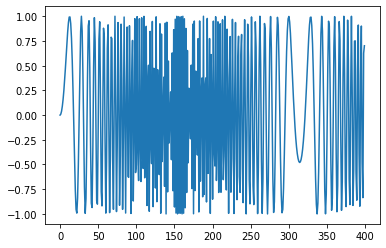

In [2]:
# make synthetic data
series = np.sin((0.1 * np.arange(400))**2)

# optional add noise
# series = series + np.random.randn(200)*0.1
print(len(series))

# plot
plt.plot(series)
plt.show();

In [3]:
# build the dataset
T = 10 
D = 1
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1, T) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape: ", X.shape, " Y.shape: ", Y.shape)

X.shape:  (390, 10)  Y.shape:  (390,)


### Autoregressive Linear Model

In [6]:
# LINEAR
_input = Input(shape=(T, ))
x = Dense(1)(_input)

# init
model = Model(_input, x)

# compile
model.compile(
    loss="mse",
    optimizer=Adam(lr=0.01),
)

# train
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 195 samples, validate on 195 samples
Epoch 1/80
195/195 [==============================] - 0s 1ms/sample - loss: 2.0892 - val_loss: 0.8292
Epoch 2/80
195/195 [==============================] - 0s 75us/sample - loss: 1.7506 - val_loss: 0.7436
Epoch 3/80
195/195 [==============================] - 0s 76us/sample - loss: 1.5126 - val_loss: 0.6816
Epoch 4/80
195/195 [==============================] - 0s 74us/sample - loss: 1.2824 - val_loss: 0.6303
Epoch 5/80
195/195 [==============================] - 0s 90us/sample - loss: 1.1232 - val_loss: 0.5917
Epoch 6/80
195/195 [==============================] - 0s 120us/sample - loss: 0.9971 - val_loss: 0.5631
Epoch 7/80
195/195 [==============================] - 0s 104us/sample - loss: 0.8856 - val_loss: 0.5393
Epoch 8/80
195/195 [==============================] - 0s 95us/sample - loss: 0.7937 - val_loss: 0.5226
Epoch 9/80
195/195 [==============================] - 0s 97us/sample - loss: 0.7196 - val_loss: 0.5121
Epoch 10/80
195/195 [=====

195/195 [==============================] - 0s 75us/sample - loss: 0.4898 - val_loss: 0.5680
Epoch 80/80
195/195 [==============================] - 0s 74us/sample - loss: 0.4913 - val_loss: 0.5729


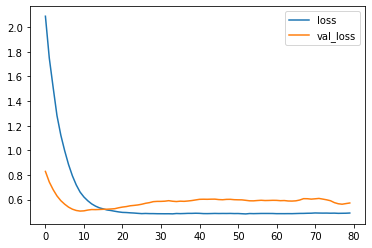

In [7]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

#### One-Step Forecast

(390, 1)


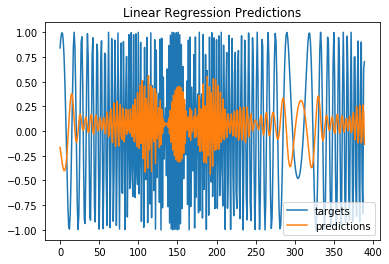

In [8]:
# ONE-STEP Forecast using true targets
outputs = model.predict(X)
print(outputs.shape)

predictions = outputs[:, 0]

plt.plot(Y, label="targets")
plt.plot(predictions, label="predictions")
plt.title("Linear Regression Predictions")
plt.legend()
plt.show();

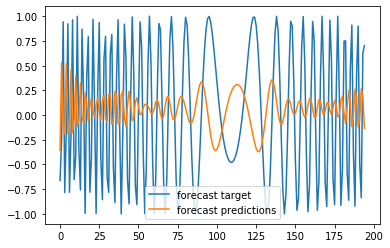

In [10]:
# WRONG forecasting using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0, 0] # 1x1 array -> scalar
    i += 1
    validation_predictions.append(p)
    
# plot 
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast predictions")
plt.legend();

#### Multi-Step Forecast